# Homework 4: Data Visualization
- **Name**:  SAI VOMANESH CHEKURI
- **UB Username**: saivoman
- **UB Person Number**:  50539234


---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [2]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file(dataset)
df = pd.read_csv("/content/scatter_data.csv")
df

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475
...,...,...
95,60.430557,271.013639
96,56.943862,226.411831
97,93.616283,275.939404
98,91.772335,337.474381


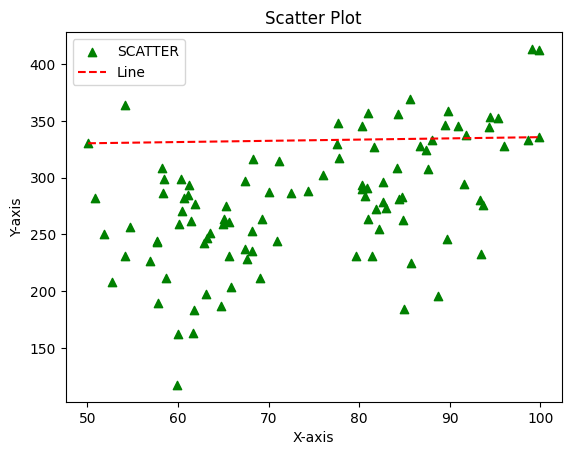

In [9]:
# It's OK to break up your code into multiple cells.
X = df['% x']
Y = df[' y ']
#creating a scatter between X and Y
plt.scatter(X, Y, label='SCATTER', color='green', marker='^')
x_min = X.min()
x_max = X.max()

# Find the corresponding y-values for the left-most and right-most points
y_min_x = df.loc[X == x_min, " y "].values[0]
y_max_x = df.loc[X  == x_max, " y "].values[0]

# Create a red dashed line from the left-most point to the right-most point
plt.plot([x_min, x_max], [y_min_x, y_max_x], color="red", linestyle="--", label="Line")

plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Problem 2 - Histogram

In [10]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
df1 = pd.read_csv("/content/student_grades.csv")
df1

,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249
...,...,...
70,70,64.622963
71,71,86.951039
72,72,85.339374
73,73,69.082293


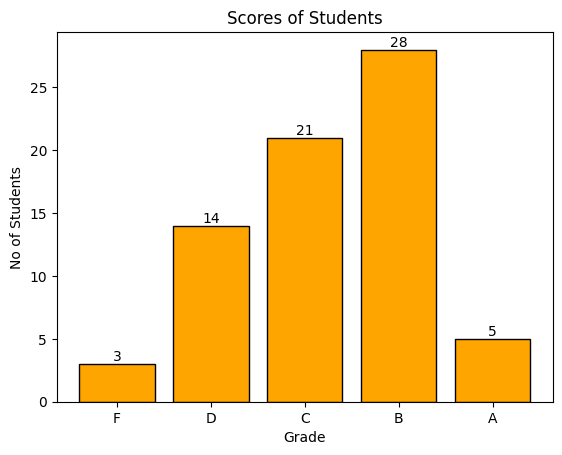

In [11]:
import numpy as np
score_of_student = df1.iloc[:, 1]
bins = [0, 60, 70, 80, 90, 100]
grades = ['F', 'D', 'C', 'B', 'A']

hist, bin_edges = np.histogram(score_of_student, bins=bins)

plt.bar(grades, hist, color='orange', edgecolor='black')
for i, count in enumerate(hist):
    plt.text(grades[i], count, str(count), ha='center', va='bottom')

plt.title('Scores of Students')
plt.xlabel('Grade')
plt.ylabel('No of Students')
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

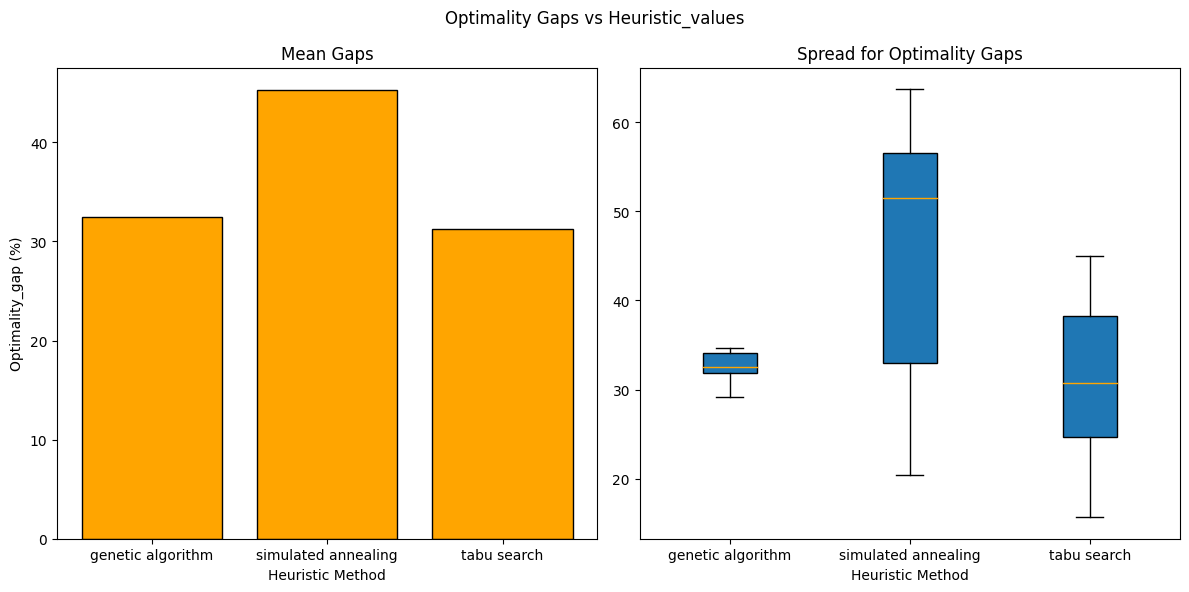

In [12]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
df2 = pd.read_csv("/content/solution_data.csv", comment="%", header=None)
df2.columns = ["Problem", "SolnMethod", "Value"]
# Calculating the optimality gaps for each heuristic
optimal = df2[df2['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristic = df2[df2['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
optimalitygap = (optimal-heuristic)/optimal*100
# Reset the index of the Series
optimalitygap = optimalitygap.reset_index()
barplot = pd.DataFrame({
    'Heuristic_values': optimalitygap['SolnMethod'],
    'Optimality_gap': optimalitygap['Value']
})
#average optimality gaps for heuristics
optimalitygap = optimalitygap.reset_index()
average_gap = barplot[barplot['Heuristic_values'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gap = average_gap.groupby('Heuristic_values')['Optimality_gap'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Optimality Gaps vs Heuristic_values")

#barplot for average optimality gaps
axes[0].bar(average_gap['Heuristic_values'], average_gap['Optimality_gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality_gap (%)")
axes[0].set_title("Mean Gaps")

#boxplot for spread of optimality gaps
boxplot_data = [optimalitygap[optimalitygap['SolnMethod'] == method]['Value'] for method in optimalitygap['SolnMethod'].unique()]

# Creating a boxplot
box_plot = axes[1].boxplot(boxplot_data, labels=optimalitygap['SolnMethod'].unique(), patch_artist=True, medianprops={'color': 'orange'})

# setting the labels and positions
labels = optimalitygap['SolnMethod'].unique()
positions = range(1, len(labels) + 1)
axes[1].set_xticks(positions)
axes[1].set_xticklabels(labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Spread for Optimality Gaps")

# Adjusting layout to ensure proper display
plt.tight_layout()
plt.show()

In [ ]:
# It's OK to break up your code into multiple cells.

---
## Part 2 - Explore New Plot Types

This code uses Matplotlib to produce three subplots, each of which shows a bar plot for a different category. 'Category' (with category names) and 'Value' (with associated values) are the two columns of the Pandas DataFrame, 'df2', that it uses. Iterating through the DataFrame for each category, it creates a subplot before using 'plt.bar' to create a bar plot for that category. The subplot's title is set to the category name. Lastly, 'Categorical Plotting' is inserted as a super title above the subplots. With the help of this code, you may see the values corresponding to each category in distinct plots contained within the same figure.

- **URL of Example Code**:  https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py
- **URL of Sample Data**:  https://think.cs.vt.edu/corgis/csv/parking_citations/

In [13]:
# Use "Code" cells to create your plots
# ...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df2 = pd.read_csv('/content/parking_citations (1).csv')
df2

,Data.Number Plate,Data.State,Data.Car.Make,Data.Car.Style,Data.Car.Color,Data.Location,Data.Violation,Data.Fine,Date.Year,Date.Month,Date.Day,Date.Time.Hour,Date.Time.Minute
0,UZD5497,VA,Suzuki,Sports Utility Veh,Blue,E VIRGINIA BEACH BOULEVARD,HANDICAPPED PARKING,440.0,2020,8,3,7,8
1,UKM3609,VA,Infiniti,Four Door,Gray,E VIRGINIA BEACH BOULEVARD,HANDICAPPED PARKING,440.0,2020,8,12,7,8
2,UHE8253,VA,Kia,Four Door,Gray,W LITTLE CREEK ROAD,HANDICAPPED PARKING,440.0,2020,11,9,14,11
3,UMK5078,VA,Toyota,Sports Utility Veh,Gray,NORVIEW AVENUE,HANDICAPPED PARKING,440.0,2020,11,26,17,11
4,UKF7574,VA,Nissan,Four Door,Blue,COACH WAY DRIVE,HANDICAPPED PARKING,440.0,2020,12,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95428,VZF7606,VA,Land Rover,Sports Utility Veh,Black,W 49TH ST,TIME ZONE C,-50.0,2020,3,12,11,3
95429,LDSH84,FL,Toyota,Sports Utility Veh,Gray,GRANBY STREET,TIME ZONE C,-50.0,2020,3,14,11,3
95430,VGY7864,VA,Lexus,Four Door,Silver,W FREEMASON STREET,NO PARKING C,-75.0,2020,2,24,11,2
95431,LDAW51,FL,Toyota,Four Door,Silver,W 41ST STREET,TIME ZONE C,-110.0,2020,1,16,13,1


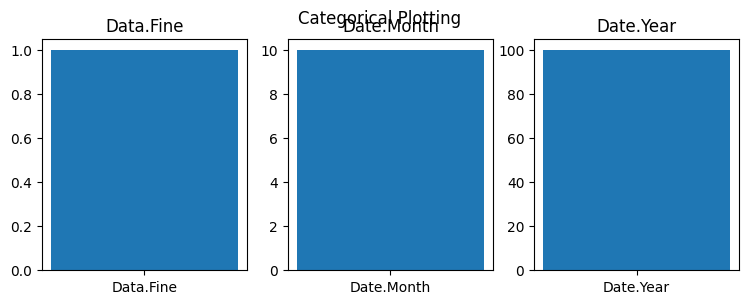

In [20]:
# It's also OK to include comments,
# either in Markdown or as Python code comments.
import matplotlib.pyplot as plt
import pandas as pd
# Assuming df2 is a DataFrame with columns 'Data.Fine', 'Date.Month', 'Date.Year'
df2 = pd.DataFrame({
    'Category': ['Data.Fine', 'Date.Month', 'Date.Year'],
    'Value': [1, 10, 100]
})

plt.figure(figsize=(9, 3))

# Creating subplots for each category
for i, category in enumerate(df2['Category']):
    plt.subplot(131 + i)  # Adjust the subplot number accordingly
    plt.bar(category, df2.loc[i, 'Value'])
    plt.title(category)

plt.suptitle('Categorical Plotting')
plt.show()

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.]